In [1]:
import scipy.io
import urllib.request
import dgl
import math
import random
import time
import copy
import joblib
import os, sys
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import dgl.function as fn
import matplotlib.pyplot as plt
from HGTDGL.model import *
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from utils import split_data, evaluate_auc, evaluate_acc
from transfer_func import no_transfer, transfer

0
LR: 0.00004, Train-Loss: 0.7299, Eval-Loss: 0.7293, Test-Loss: 0.7292, Train-ACC: 0.4964, Eval-ACC: 0.4998, Test-ACC: 0.4995, Best-Eval-ACC: 0.4998, Best-Test-ACC: 0.4995
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5100, Best-Test-ACC: 0.5120
LR: 0.00081, Train-Loss: 0.6566, Eval-Loss: 0.6561, Test-Loss: 0.6580, Train-ACC: 0.6302, Eval-ACC: 0.6350, Test-ACC: 0.6288, Best-Eval-ACC: 0.6350, Best-Test-ACC: 0.6288
LR: 0.00057, Train-Loss: 0.6157, Eval-Loss: 0.6195, Test-Loss: 0.6192, Train-ACC: 0.7737, Eval-ACC: 0.7691, Test-ACC: 0.7676, Best-Eval-ACC: 0.7691, Best-Test-ACC: 0.7676
LR: 0.00031, Train-Loss: 0.5962, Eval-Loss: 0.6101, Test-Loss: 0.6082, Train-ACC: 0.8203, Eval-ACC: 0.7907, Test-ACC: 0.7933, Best-Eval-ACC: 0.7907, Best-Test-ACC: 0.7933
LR: 0.00010, Train-Loss: 0.5894, Eval-Loss: 0.6070, Test-Loss: 0.6038, Train-ACC: 0.8280, Eval-ACC: 0.7876, Test-ACC: 0.7939, Best-Eval-ACC: 0.

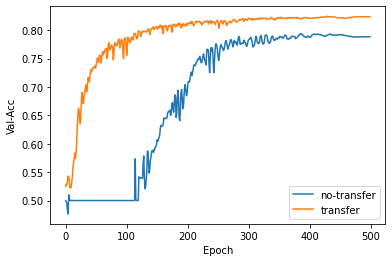

1
LR: 0.00004, Train-Loss: 0.7171, Eval-Loss: 0.7151, Test-Loss: 0.7149, Train-ACC: 0.5014, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6530, Eval-Loss: 0.6530, Test-Loss: 0.6541, Train-ACC: 0.6484, Eval-ACC: 0.6497, Test-ACC: 0.6427, Best-Eval-ACC: 0.6524, Best-Test-ACC: 0.6511
LR: 0.00081, Train-Loss: 0.5996, Eval-Loss: 0.6024, Test-Loss: 0.6047, Train-ACC: 0.8101, Eval-ACC: 0.7906, Test-ACC: 0.7854, Best-Eval-ACC: 0.7984, Best-Test-ACC: 0.7915
LR: 0.00057, Train-Loss: 0.5849, Eval-Loss: 0.5929, Test-Loss: 0.5928, Train-ACC: 0.8401, Eval-ACC: 0.8173, Test-ACC: 0.8147, Best-Eval-ACC: 0.8240, Best-Test-ACC: 0.8204
LR: 0.00031, Train-Loss: 0.5724, Eval-Loss: 0.5892, Test-Loss: 0.5902, Train-ACC: 0.8545, Eval-ACC: 0.8145, Test-ACC: 0.8101, Best-Eval-ACC: 0.8290, Best-Test-ACC: 0.8258
LR: 0.00010, Train-Loss: 0.5689, Eval-Loss: 0.5875, Test-Loss: 0.5870, Train-ACC: 0.8666, Eval-ACC: 0.8290, Test-ACC: 0.8295, Best-Eval-ACC: 0.

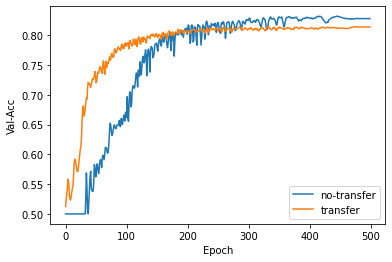

2
LR: 0.00004, Train-Loss: 0.7252, Eval-Loss: 0.7234, Test-Loss: 0.7233, Train-ACC: 0.4914, Eval-ACC: 0.4879, Test-ACC: 0.4995, Best-Eval-ACC: 0.4879, Best-Test-ACC: 0.4995
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5019, Best-Test-ACC: 0.5017
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5019, Best-Test-ACC: 0.5017
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5019, Best-Test-ACC: 0.5017
LR: 0.00031, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5019, Best-Test-ACC: 0.5017
LR: 0.00010, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.

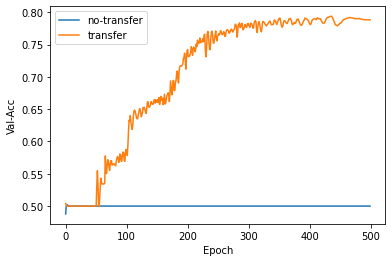

3
LR: 0.00004, Train-Loss: 0.7231, Eval-Loss: 0.7227, Test-Loss: 0.7226, Train-ACC: 0.5038, Eval-ACC: 0.5078, Test-ACC: 0.5106, Best-Eval-ACC: 0.5078, Best-Test-ACC: 0.5106
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5078, Best-Test-ACC: 0.5106
LR: 0.00081, Train-Loss: 0.6691, Eval-Loss: 0.6664, Test-Loss: 0.6689, Train-ACC: 0.5706, Eval-ACC: 0.5840, Test-ACC: 0.5769, Best-Eval-ACC: 0.5910, Best-Test-ACC: 0.5956
LR: 0.00057, Train-Loss: 0.6371, Eval-Loss: 0.6406, Test-Loss: 0.6410, Train-ACC: 0.6986, Eval-ACC: 0.6867, Test-ACC: 0.6850, Best-Eval-ACC: 0.6913, Best-Test-ACC: 0.6889
LR: 0.00031, Train-Loss: 0.6067, Eval-Loss: 0.6148, Test-Loss: 0.6133, Train-ACC: 0.7890, Eval-ACC: 0.7671, Test-ACC: 0.7701, Best-Eval-ACC: 0.7705, Best-Test-ACC: 0.7753
LR: 0.00010, Train-Loss: 0.5974, Eval-Loss: 0.6092, Test-Loss: 0.6069, Train-ACC: 0.8060, Eval-ACC: 0.7817, Test-ACC: 0.7890, Best-Eval-ACC: 0.

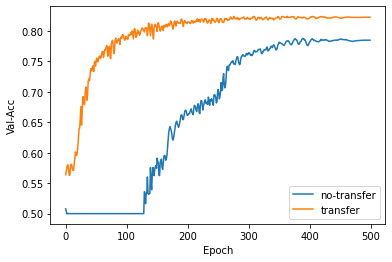

4
LR: 0.00004, Train-Loss: 0.7166, Eval-Loss: 0.7137, Test-Loss: 0.7137, Train-ACC: 0.4994, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6612, Eval-Loss: 0.6590, Test-Loss: 0.6591, Train-ACC: 0.6319, Eval-ACC: 0.6362, Test-ACC: 0.6379, Best-Eval-ACC: 0.6362, Best-Test-ACC: 0.6379
LR: 0.00081, Train-Loss: 0.6120, Eval-Loss: 0.6130, Test-Loss: 0.6116, Train-ACC: 0.7657, Eval-ACC: 0.7648, Test-ACC: 0.7703, Best-Eval-ACC: 0.7669, Best-Test-ACC: 0.7736
LR: 0.00057, Train-Loss: 0.5869, Eval-Loss: 0.6006, Test-Loss: 0.5961, Train-ACC: 0.8264, Eval-ACC: 0.8039, Test-ACC: 0.8122, Best-Eval-ACC: 0.8052, Best-Test-ACC: 0.8093
LR: 0.00031, Train-Loss: 0.5857, Eval-Loss: 0.5969, Test-Loss: 0.5921, Train-ACC: 0.8153, Eval-ACC: 0.8015, Test-ACC: 0.8113, Best-Eval-ACC: 0.8123, Best-Test-ACC: 0.8177
LR: 0.00010, Train-Loss: 0.5778, Eval-Loss: 0.5957, Test-Loss: 0.5916, Train-ACC: 0.8401, Eval-ACC: 0.8133, Test-ACC: 0.8177, Best-Eval-ACC: 0.

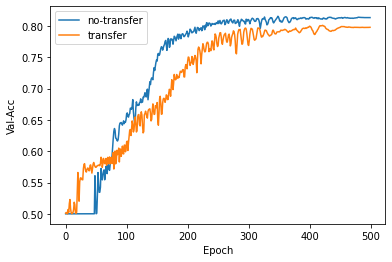

5
LR: 0.00004, Train-Loss: 0.7195, Eval-Loss: 0.7184, Test-Loss: 0.7184, Train-ACC: 0.5008, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.5000
LR: 0.00096, Train-Loss: 0.6398, Eval-Loss: 0.6416, Test-Loss: 0.6351, Train-ACC: 0.6852, Eval-ACC: 0.6761, Test-ACC: 0.6945, Best-Eval-ACC: 0.6866, Best-Test-ACC: 0.6970
LR: 0.00081, Train-Loss: 0.5920, Eval-Loss: 0.6046, Test-Loss: 0.6041, Train-ACC: 0.8173, Eval-ACC: 0.8036, Test-ACC: 0.8015, Best-Eval-ACC: 0.8046, Best-Test-ACC: 0.8049
LR: 0.00057, Train-Loss: 0.5832, Eval-Loss: 0.5958, Test-Loss: 0.5926, Train-ACC: 0.8161, Eval-ACC: 0.8076, Test-ACC: 0.8131, Best-Eval-ACC: 0.8188, Best-Test-ACC: 0.8214
LR: 0.00031, Train-Loss: 0.5695, Eval-Loss: 0.5896, Test-Loss: 0.5871, Train-ACC: 0.8612, Eval-ACC: 0.8222, Test-ACC: 0.8275, Best-Eval-ACC: 0.8270, Best-Test-ACC: 0.8322
LR: 0.00010, Train-Loss: 0.5663, Eval-Loss: 0.5879, Test-Loss: 0.5860, Train-ACC: 0.8712, Eval-ACC: 0.8307, Test-ACC: 0.8323, Best-Eval-ACC: 0.

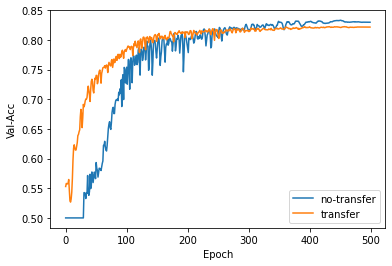

6
LR: 0.00004, Train-Loss: 0.7253, Eval-Loss: 0.7245, Test-Loss: 0.7246, Train-ACC: 0.5038, Eval-ACC: 0.5096, Test-ACC: 0.5030, Best-Eval-ACC: 0.5096, Best-Test-ACC: 0.5030
LR: 0.00096, Train-Loss: 0.6548, Eval-Loss: 0.6546, Test-Loss: 0.6550, Train-ACC: 0.6294, Eval-ACC: 0.6321, Test-ACC: 0.6319, Best-Eval-ACC: 0.6508, Best-Test-ACC: 0.6583
LR: 0.00081, Train-Loss: 0.5998, Eval-Loss: 0.6052, Test-Loss: 0.6052, Train-ACC: 0.7919, Eval-ACC: 0.7878, Test-ACC: 0.7891, Best-Eval-ACC: 0.7909, Best-Test-ACC: 0.7876
LR: 0.00057, Train-Loss: 0.5845, Eval-Loss: 0.5975, Test-Loss: 0.5955, Train-ACC: 0.8298, Eval-ACC: 0.8027, Test-ACC: 0.8066, Best-Eval-ACC: 0.8110, Best-Test-ACC: 0.8094
LR: 0.00031, Train-Loss: 0.5767, Eval-Loss: 0.5954, Test-Loss: 0.5933, Train-ACC: 0.8518, Eval-ACC: 0.8144, Test-ACC: 0.8210, Best-Eval-ACC: 0.8189, Best-Test-ACC: 0.8223
LR: 0.00010, Train-Loss: 0.5729, Eval-Loss: 0.5934, Test-Loss: 0.5922, Train-ACC: 0.8605, Eval-ACC: 0.8195, Test-ACC: 0.8232, Best-Eval-ACC: 0.

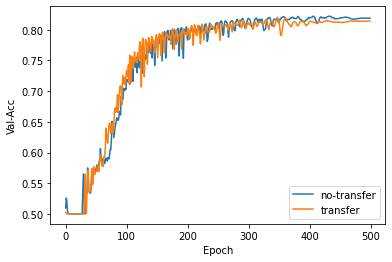

7
LR: 0.00004, Train-Loss: 0.7212, Eval-Loss: 0.7205, Test-Loss: 0.7205, Train-ACC: 0.4978, Eval-ACC: 0.4998, Test-ACC: 0.5001, Best-Eval-ACC: 0.4998, Best-Test-ACC: 0.5001
LR: 0.00096, Train-Loss: 0.6499, Eval-Loss: 0.6528, Test-Loss: 0.6519, Train-ACC: 0.6602, Eval-ACC: 0.6631, Test-ACC: 0.6607, Best-Eval-ACC: 0.6631, Best-Test-ACC: 0.6607
LR: 0.00081, Train-Loss: 0.6062, Eval-Loss: 0.6163, Test-Loss: 0.6189, Train-ACC: 0.7825, Eval-ACC: 0.7745, Test-ACC: 0.7675, Best-Eval-ACC: 0.7745, Best-Test-ACC: 0.7675
LR: 0.00057, Train-Loss: 0.5887, Eval-Loss: 0.6058, Test-Loss: 0.6062, Train-ACC: 0.8300, Eval-ACC: 0.7905, Test-ACC: 0.7932, Best-Eval-ACC: 0.7949, Best-Test-ACC: 0.7912
LR: 0.00031, Train-Loss: 0.5814, Eval-Loss: 0.5981, Test-Loss: 0.5973, Train-ACC: 0.8377, Eval-ACC: 0.8069, Test-ACC: 0.8087, Best-Eval-ACC: 0.8094, Best-Test-ACC: 0.8108
LR: 0.00010, Train-Loss: 0.5794, Eval-Loss: 0.5961, Test-Loss: 0.5966, Train-ACC: 0.8452, Eval-ACC: 0.8128, Test-ACC: 0.8119, Best-Eval-ACC: 0.

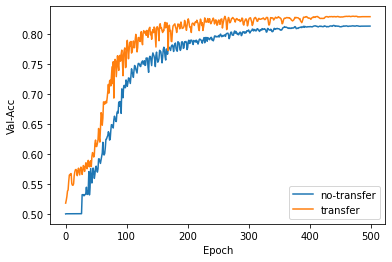

8
LR: 0.00004, Train-Loss: 0.7310, Eval-Loss: 0.7311, Test-Loss: 0.7310, Train-ACC: 0.4971, Eval-ACC: 0.5000, Test-ACC: 0.4995, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4995
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4995
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4995
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4995
LR: 0.00031, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5000, Best-Test-ACC: 0.4995
LR: 0.00010, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.

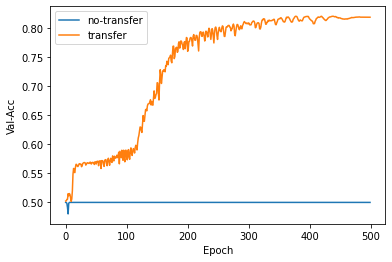

9
LR: 0.00004, Train-Loss: 0.7264, Eval-Loss: 0.7252, Test-Loss: 0.7252, Train-ACC: 0.5033, Eval-ACC: 0.4988, Test-ACC: 0.4980, Best-Eval-ACC: 0.4988, Best-Test-ACC: 0.4980
LR: 0.00096, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5055, Best-Test-ACC: 0.5050
LR: 0.00081, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5055, Best-Test-ACC: 0.5050
LR: 0.00057, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5055, Best-Test-ACC: 0.5050
LR: 0.00031, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.5055, Best-Test-ACC: 0.5050
LR: 0.00010, Train-Loss: 0.6931, Eval-Loss: 0.6931, Test-Loss: 0.6931, Train-ACC: 0.5000, Eval-ACC: 0.5000, Test-ACC: 0.5000, Best-Eval-ACC: 0.

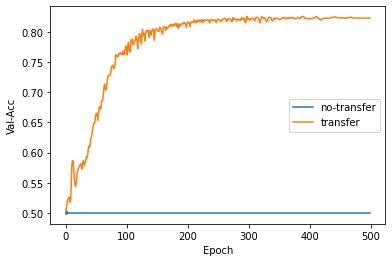

NO TRANSFER -- Total Time: 517.6795 +/- 5.2660, Best Model Time: 296.9953 +/- 195.2640, Best Val Acc: 0.7207 +/- 0.1435, Best Test Acc: 0.7219 +/- 0.1444
TRANSFER -- Total Time: 524.2857 +/- 20.6207, Best Model Time: 406.1974 +/- 55.4731, Best Val Acc: 0.8178 +/- 0.0110, Best Test Acc: 0.8164 +/- 0.0096


In [2]:
n = 10
best_time_list_no_transfer = []
total_time_list_no_transfer = []
best_eval_acc_list_no_transfer = []
best_test_acc_list_no_transfer = []

best_time_list_transfer = []
total_time_list_transfer = []
best_eval_acc_list_transfer = []
best_test_acc_list_transfer = []

target1 = 3341
target2 = 1

for i in range(n):
    print(i)
    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list,\
    train_data_output, eval_data_output, test_data_output, used_data_output = no_transfer(target1)
    print('---------------')
    best_time_list_no_transfer.append(best_model_training_time)
    total_time_list_no_transfer.append(total_training_time)
    best_eval_acc_list_no_transfer.append(best_eval_acc)
    best_test_acc_list_no_transfer.append(best_test_acc)
    eval_acc_list_no_transfer = eval_acc_list
    
    best_model, _, _, _, _, _, _, _, _, _, _, _, _ = no_transfer(target2)
    print('---------------')   

    best_model, best_model_training_time, total_training_time,\
    best_eval_acc, best_test_acc, time_list, train_acc_list, eval_acc_list, test_acc_list\
    = transfer(target1, best_model, train_data_output, eval_data_output, test_data_output, used_data_output)
    print('---------------')

    best_time_list_transfer.append(best_model_training_time)
    total_time_list_transfer.append(total_training_time)
    best_eval_acc_list_transfer.append(best_eval_acc)
    best_test_acc_list_transfer.append(best_test_acc)
    eval_acc_list_transfer = eval_acc_list
    
    epoches = list(range(500))
    plt.plot(epoches, eval_acc_list_no_transfer, label='no-transfer')
    plt.plot(epoches, eval_acc_list_transfer, label='transfer')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Val-Acc')
    plt.show()
    
best_time_no_transfer_avg = np.mean(best_time_list_no_transfer)
best_time_no_transfer_std = np.std(best_time_list_no_transfer)
total_time_no_transfer_avg = np.mean(total_time_list_no_transfer)
total_time_no_transfer_std = np.std(total_time_list_no_transfer)
best_eval_acc_no_transfer_avg = np.mean(best_eval_acc_list_no_transfer)
best_eval_acc_no_transfer_std = np.std(best_eval_acc_list_no_transfer)
best_test_acc_no_transfer_avg = np.mean(best_test_acc_list_no_transfer)
best_test_acc_no_transfer_std = np.std(best_test_acc_list_no_transfer)

best_time_transfer_avg = np.mean(best_time_list_transfer)
best_time_transfer_std = np.std(best_time_list_transfer)
total_time_transfer_avg = np.mean(total_time_list_transfer)
total_time_transfer_std = np.std(total_time_list_transfer)
best_eval_acc_transfer_avg = np.mean(best_eval_acc_list_transfer)
best_eval_acc_transfer_std = np.std(best_eval_acc_list_transfer)
best_test_acc_transfer_avg = np.mean(best_test_acc_list_transfer)
best_test_acc_transfer_std = np.std(best_test_acc_list_transfer)

print('NO TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_no_transfer_avg, 
    total_time_no_transfer_std, 
    best_time_no_transfer_avg,
    best_time_no_transfer_std, 
    best_eval_acc_no_transfer_avg, 
    best_eval_acc_no_transfer_std, 
    best_test_acc_no_transfer_avg, 
    best_test_acc_no_transfer_std, 
))

print('TRANSFER -- Total Time: %.4f +/- %.4f, Best Model Time: %.4f +/- %.4f, Best Val Acc: %.4f +/- %.4f, Best Test Acc: %.4f +/- %.4f' %(
    total_time_transfer_avg, 
    total_time_transfer_std, 
    best_time_transfer_avg,
    best_time_transfer_std, 
    best_eval_acc_transfer_avg, 
    best_eval_acc_transfer_std, 
    best_test_acc_transfer_avg, 
    best_test_acc_transfer_std, 
))